In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wine_file_name = "/content/drive/MyDrive/Data analytics course/winemag-data-130k-v2.csv"
wine_df = pd.read_csv(wine_file_name, index_col=0)
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
wine_df.price.mean()

35.363389129985535

In [ ]:
wine_df.points.mean()

88.44713820775404

In [ ]:
wine_df.variety.describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

In [ ]:
wine_df.designation.describe()

count       92506
unique      37979
top       Reserve
freq         2009
Name: designation, dtype: object

Since we work most of time with the same set of columns - it is easier to observe dataset in focus-oriented way.

In [ ]:
#Let's check columns's indexes
wine_df.iloc[:, 0]

0            Italy
1         Portugal
2               US
3               US
4               US
            ...   
129966     Germany
129967          US
129968      France
129969      France
129970      France
Name: country, Length: 129971, dtype: object

In [ ]:
#Check how new columns' list will look like
wine_df_order = [0, 3, 4, 11, 2, 5, 12, 6, 7, 8, 9, 10]
wine_df.columns[wine_df_order]

Index(['country', 'points', 'price', 'variety', 'designation', 'province',
       'winery', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title'],
      dtype='object')

In [ ]:
#Apply new order of columns and assign to a new Data Frame
wine_df_reordered = wine_df[wine_df.columns[wine_df_order]]
wine_df_reordered.head()

,country,points,price,variety,designation,province,winery,region_1,region_2,taster_name,taster_twitter_handle,title
0,Italy,87,NaN,White Blend,Vulkà Bianco,Sicily & Sardinia,Nicosia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna)
1,Portugal,87,15.0,Portuguese Red,Avidagos,Douro,Quinta dos Avidagos,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,US,87,14.0,Pinot Gris,NaN,Oregon,Rainstorm,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,US,87,13.0,Riesling,Reserve Late Harvest,Michigan,St. Julian,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...
4,US,87,65.0,Pinot Noir,Vintner's Reserve Wild Child Block,Oregon,Sweet Cheeks,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...


In [ ]:
wine_df_reordered.country.count()

129908

# Data Grouping

Example: how many wines do we have in each country?

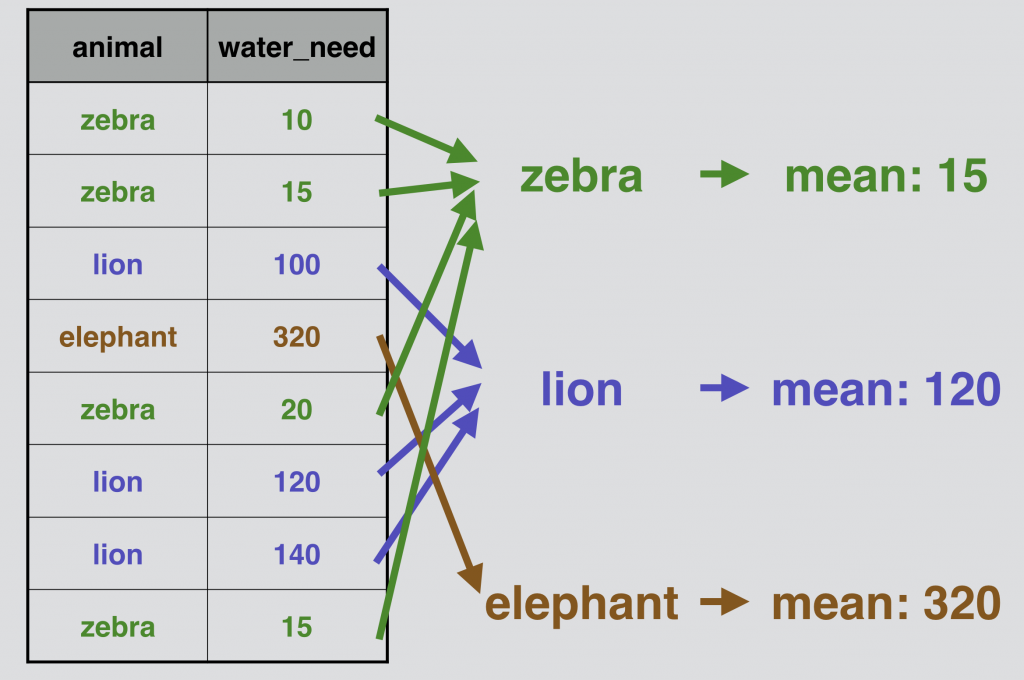

In [ ]:
wine_group_country = wine_df_reordered.groupby("country")

In [ ]:
wine_group_country.groups

{'Argentina': [16, 17, 183, 224, 231, 245, 253, 261, 266, 273, 275, 284, 294, 553, 567, 605, 615, 700, 715, 721, 722, 728, 734, 735, 738, 785, 788, 910, 914, 919, 922, 926, 930, 985, 1021, 1040, 1170, 1174, 1178, 1193, 1194, 1195, 1346, 1394, 1482, 1493, 1496, 1497, 1618, 1621, 1622, 1626, 1634, 1646, 1648, 1651, 1665, 1680, 1695, 1790, 1815, 1822, 1844, 1851, 1855, 1899, 1902, 1991, 1992, 1993, 2002, 2012, 2083, 2141, 2155, 2254, 2277, 2291, 2351, 2387, 2551, 2615, 2618, 2673, 2795, 2925, 2934, 2935, 2942, 2947, 2954, 2964, 3045, 3056, 3057, 3120, 3136, 3148, 3149, 3157, ...], 'Armenia': [8170, 66146], 'Australia': [77, 83, 123, 191, 232, 238, 246, 293, 345, 346, 348, 349, 356, 360, 365, 628, 633, 636, 652, 746, 766, 768, 807, 813, 866, 893, 920, 924, 987, 997, 1008, 1074, 1154, 1182, 1198, 1199, 1478, 1636, 1649, 1666, 1706, 1707, 1712, 1723, 1886, 1890, 1891, 1894, 1897, 1903, 1908, 1909, 1930, 1934, 2137, 2256, 2312, 2517, 2587, 2594, 2598, 2600, 2611, 2617, 2631, 2640, 2642, 2949,

In [ ]:
wine_group_country.size()

country
Argentina                  3800
Armenia                       2
Australia                  2329
Austria                    3345
Bosnia and Herzegovina        2
Brazil                       52
Bulgaria                    141
Canada                      257
Chile                      4472
China                         1
Croatia                      73
Cyprus                       11
Czech Republic               12
Egypt                         1
England                      74
France                    22093
Georgia                      86
Germany                    2165
Greece                      466
Hungary                     146
India                         9
Israel                      505
Italy                     19540
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       70
Moldova                      59
Morocco                      28
New Zealand                1419
Peru                         16


In [ ]:
wine_group_country.get_group("Serbia")

,country,points,price,variety,designation,province,winery,region_1,region_2,taster_name,taster_twitter_handle,title
5085,Serbia,87,26.0,Morava,NaN,Pocerina,Milijan Jelić,NaN,NaN,Jeff Jenssen,@worldwineguys,Milijan Jelić 2011 Morava (Pocerina)
22398,Serbia,87,16.0,Blauer Portugieser,Portuguiser,Fruška Gora,Agrina,NaN,NaN,Jeff Jenssen,@worldwineguys,Agrina 2012 Portuguiser Blauer Portugieser (Fr...
29284,Serbia,89,40.0,Red Blend,Sub Rosa,Župa,Budimir,NaN,NaN,Jeff Jenssen,@worldwineguys,Budimir 2009 Sub Rosa Red (Župa)
38522,Serbia,89,20.0,Riesling,Margus Margi,Župa,Budimir,NaN,NaN,Jeff Jenssen,@worldwineguys,Budimir 2009 Margus Margi Riesling (Župa)
38927,Serbia,88,18.0,Tamjanika,Župska,Župa,Budimir,NaN,NaN,Jeff Jenssen,@worldwineguys,Budimir 2013 Župska Tamjanika (Župa)
51794,Serbia,86,15.0,Portuguiser,NaN,Fruška Gora,Agrina,NaN,NaN,Jeff Jenssen,@worldwineguys,Agrina 2014 Portuguiser (Fruška Gora)
64364,Serbia,89,40.0,Red Blend,Sub Rosa,Župa,Budimir,NaN,NaN,Jeff Jenssen,@worldwineguys,Budimir 2009 Sub Rosa Red (Župa)
70948,Serbia,89,42.0,Red Blend,Svb Rosa,Župa,Budimir,NaN,NaN,Jeff Jenssen,@worldwineguys,Budimir 2007 Svb Rosa Red (Župa)
72861,Serbia,86,22.0,Riesling,Margus Margi,Župa,Budimir,NaN,NaN,Jeff Jenssen,@worldwineguys,Budimir 2008 Margus Margi Riesling (Župa)
108102,Serbia,86,15.0,Portuguiser,NaN,Fruška Gora,Agrina,NaN,NaN,Jeff Jenssen,@worldwineguys,Agrina 2014 Portuguiser (Fruška Gora)


In [ ]:
wine_group_country.sum()

,points,price
country,,
Argentina,329499,92060.0
Armenia,175,29.0
Australia,206304,81294.0
Austria,301389,86105.0
Bosnia and Herzegovina,173,25.0
Brazil,4403,1117.0
Bulgaria,12399,2065.0
Canada,22968,9071.0
Chile,386799,91793.0


In [ ]:
wine_group_country.mean()

,points,price
country,,
Argentina,86.710263,24.510117
Armenia,87.500000,14.500000
Australia,88.580507,35.437663
Austria,90.101345,30.762772
Bosnia and Herzegovina,86.500000,12.500000
Brazil,84.673077,23.765957
Bulgaria,87.936170,14.645390
Canada,89.369650,35.712598
Chile,86.493515,20.786458


In [ ]:
wine_group_country.mean().sort_values("price")

,points,price
country,,
Ukraine,84.071429,9.214286
Bosnia and Herzegovina,86.500000,12.500000
India,90.222222,13.333333
Armenia,87.500000,14.500000
Bulgaria,87.936170,14.645390
Romania,86.400000,15.241667
Macedonia,86.833333,15.583333
Slovakia,87.000000,16.000000
Cyprus,87.181818,16.272727


In [ ]:
wine_group_country.variety.count()

country
Argentina                  3800
Armenia                       2
Australia                  2329
Austria                    3345
Bosnia and Herzegovina        2
Brazil                       52
Bulgaria                    141
Canada                      257
Chile                      4471
China                         1
Croatia                      73
Cyprus                       11
Czech Republic               12
Egypt                         1
England                      74
France                    22093
Georgia                      86
Germany                    2165
Greece                      466
Hungary                     146
India                         9
Israel                      505
Italy                     19540
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       70
Moldova                      59
Morocco                      28
New Zealand                1419
Peru                         16


In [ ]:
wine_df_reordered.groupby("points").price.min()

points
80      5.0
81      5.0
82      4.0
83      4.0
84      4.0
85      4.0
86      4.0
87      5.0
88      6.0
89      7.0
90      8.0
91      7.0
92     11.0
93     12.0
94     13.0
95     20.0
96     20.0
97     35.0
98     50.0
99     44.0
100    80.0
Name: price, dtype: float64

In [ ]:
import numpy as np

wine_df_reordered.groupby("points").price.agg([np.min, np.max])

,amin,amax
points,,
80,5.0,69.0
81,5.0,130.0
82,4.0,150.0
83,4.0,225.0
84,4.0,225.0
85,4.0,320.0
86,4.0,170.0
87,5.0,800.0
88,6.0,3300.0


# Small Check: 

Q 04.1: Fill-in "XXX" so that evaluate each groups' max price minus mean price. What type result will have?


---



We can use even custom functions to use for aggregation

In [ ]:
def max_minus_mean(grouped_data):
    return(XXX)

wine_df_reordered.groupby("country").XXX.agg(max_minus_mean)

AttributeError: ignored

In [ ]:
def max_minus_mean(grouped_data):
    return(grouped_data.max() - grouped_data.mean())

wine_df_reordered.groupby("country").price.agg(max_minus_mean)

country
Argentina                  205.489883
Armenia                      0.500000
Australia                  814.562337
Austria                   1069.237228
Bosnia and Herzegovina       0.500000
Brazil                      36.234043
Bulgaria                    85.354610
Canada                      84.287402
Chile                      379.213542
China                        0.000000
Croatia                     39.549296
Cyprus                       4.727273
Czech Republic              20.750000
Egypt                             NaN
England                     43.318841
France                    3258.860880
Georgia                     20.678571
Germany                    732.742453
Greece                      56.635575
Hungary                    723.351724
India                        6.666667
Israel                     118.231084
Italy                      860.336230
Lebanon                     44.314286
Luxembourg                   6.666667
Macedonia                    4.416667
Mexi

In [ ]:
#Convert back to DataFrame
wine_df_reordered.groupby("country").price.agg(max_minus_mean).reset_index()

,country,price
0,Argentina,205.489883
1,Armenia,0.500000
2,Australia,814.562337
3,Austria,1069.237228
4,Bosnia and Herzegovina,0.500000
5,Brazil,36.234043
6,Bulgaria,85.354610
7,Canada,84.287402
8,Chile,379.213542
9,China,0.000000


# Mapping

Map and apply functions

**Map** takes one set of values and "maps" them to another set of values. Map expects Series as a data type and returns Series as well. Map is used for:

1.   Create new representations from existing data
2.   Transformation of data from the one format to another



In [ ]:
wine_df_reordered.head()

,country,points,price,variety,designation,province,winery,region_1,region_2,taster_name,taster_twitter_handle,title
0,Italy,87,NaN,White Blend,Vulkà Bianco,Sicily & Sardinia,Nicosia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna)
1,Portugal,87,15.0,Portuguese Red,Avidagos,Douro,Quinta dos Avidagos,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,US,87,14.0,Pinot Gris,NaN,Oregon,Rainstorm,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,US,87,13.0,Riesling,Reserve Late Harvest,Michigan,St. Julian,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...
4,US,87,65.0,Pinot Noir,Vintner's Reserve Wild Child Block,Oregon,Sweet Cheeks,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...


In [ ]:
# %%timeit
wine_points_max = wine_df_reordered.points.max()
wine_df_reordered.points.map(lambda x: x-wine_points_max)

0        -13
1        -13
2        -13
3        -13
4        -13
          ..
129966   -10
129967   -10
129968   -10
129969   -10
129970   -10
Name: points, Length: 129971, dtype: int64

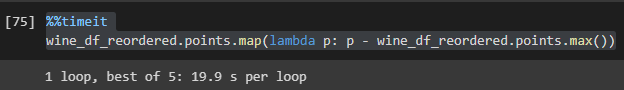

**map** function has been called, but original DataFrame wasn't changed. To change it we shall assign resulted Series to a column.

In [ ]:
wine_df_reordered.loc["points"] = wine_df_reordered.points.map(lambda x: x-wine_points_max) #izmaina series

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
wine_df_reordered.head()

,country,points,price,variety,designation,province,winery,region_1,region_2,taster_name,taster_twitter_handle,title
0,Italy,87.0,NaN,White Blend,Vulkà Bianco,Sicily & Sardinia,Nicosia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna)
1,Portugal,87.0,15.0,Portuguese Red,Avidagos,Douro,Quinta dos Avidagos,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,US,87.0,14.0,Pinot Gris,NaN,Oregon,Rainstorm,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,US,87.0,13.0,Riesling,Reserve Late Harvest,Michigan,St. Julian,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...
4,US,87.0,65.0,Pinot Noir,Vintner's Reserve Wild Child Block,Oregon,Sweet Cheeks,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...


But...it wasn't changed either. Ok, there is a worning - we shall assign to a specific notation of indexing, thus modification of *orginal* happens not *copy* of the DataFrame.

In [ ]:
wine_df_reordered.loc[:,"points"] = wine_df_reordered.points.map(lambda x: x-wine_points_max)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
wine_df_reordered.head()

,country,points,price,variety,designation,province,winery,region_1,region_2,taster_name,taster_twitter_handle,title
0,Italy,-13.0,NaN,White Blend,Vulkà Bianco,Sicily & Sardinia,Nicosia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna)
1,Portugal,-13.0,15.0,Portuguese Red,Avidagos,Douro,Quinta dos Avidagos,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,US,-13.0,14.0,Pinot Gris,NaN,Oregon,Rainstorm,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,US,-13.0,13.0,Riesling,Reserve Late Harvest,Michigan,St. Julian,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...
4,US,-13.0,65.0,Pinot Noir,Vintner's Reserve Wild Child Block,Oregon,Sweet Cheeks,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...


**apply** function is second option how to apply change **to whole DataFrame** row by row

In [ ]:
wine_df_reordered_price_mean = wine_df_reordered["price"].mean() #apply izmanto visu dataframe

def mean_price(row):
  row.price = row.price - wine_df_reordered_price_mean
  return row

wine_df_reordered.apply(mean_price, axis="columns")

,country,points,price,variety,designation,province,winery,region_1,region_2,taster_name,taster_twitter_handle,title
0,Italy,-13.0,NaN,White Blend,Vulkà Bianco,Sicily & Sardinia,Nicosia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna)
1,Portugal,-13.0,-20.363389,Portuguese Red,Avidagos,Douro,Quinta dos Avidagos,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,US,-13.0,-21.363389,Pinot Gris,NaN,Oregon,Rainstorm,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,US,-13.0,-22.363389,Riesling,Reserve Late Harvest,Michigan,St. Julian,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...
4,US,-13.0,29.636611,Pinot Noir,Vintner's Reserve Wild Child Block,Oregon,Sweet Cheeks,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
...,...,...,...,...,...,...,...,...,...,...,...,...
129967,US,-10.0,39.636611,Pinot Noir,NaN,Oregon,Citation,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
129968,France,-10.0,-5.363389,Gewürztraminer,Kritt,Alsace,Domaine Gresser,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969,France,-10.0,-3.363389,Pinot Gris,NaN,Alsace,Domaine Marcel Deiss,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970,France,-10.0,-14.363389,Gewürztraminer,Lieu-dit Harth Cuvée Caroline,Alsace,Domaine Schoffit,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...


The same as with **map** function - *orginal* wasn't changed.

**Q04.1** Translate to 5-start rating

Transalte rating (*points*) in the DataFrame to star-rating as per rule:

3 stars: 95 or higher;
2 stars: a rating of at least 85 but less than 95
1 star: any other left rating.

In [ ]:
wine_df_reordered_2 = wine_df_reordered

def stars(row):
  if row.points >= 95:
    row.points = "***"
  elif row.points >= 85 and < 95:
    row.points = "**"
  else:
    row.points = "*"
  return row

wine_df_reordered_2.loc[:,"points"] = wine_df_reordered_2.points.map(stars)


SyntaxError: ignored

# Map and Apply with Aggregations

In [ ]:
wine_df.groupby("winery").apply(lambda df: df.title.iloc[0]) #izvelk 0 elementu

winery
1+1=3                                     1+1=3 NV Rosé Sparkling (Cava)
10 Knots                            10 Knots 2010 Viognier (Paso Robles)
100 Percent Wine              100 Percent Wine 2015 Moscato (California)
1000 Stories           1000 Stories 2013 Bourbon Barrel Aged Zinfande...
1070 Green                  1070 Green 2011 Sauvignon Blanc (Rutherford)
                                             ...                        
Órale                       Órale 2011 Cabronita Red (Santa Ynez Valley)
Öko                    Öko 2013 Made With Organically Grown Grapes Ma...
Ökonomierat Rebholz    Ökonomierat Rebholz 2007 Von Rotliegenden Spät...
àMaurice               àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                                    Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

In [ ]:
wine_df.groupby("winery").apply(lambda df: df.title)

winery          
1+1=3     20319                        1+1=3 NV Rosé Sparkling (Cava)
          33657     1+1=3 NV Cygnus Brut Nature Reserva Made With ...
          55163                        1+1=3 NV Brut Sparkling (Cava)
          56109     1+1=3 NV Cygnus Brut Nature Reserva Made With ...
          63807          1+1=3 2008 Rosé Cabernet Sauvignon (Penedès)
                                          ...                        
àMaurice  124544           àMaurice 2009 Syrah (Columbia Valley (WA))
          128023       àMaurice NV Pour Me Red (Columbia Valley (WA))
Štoka     10290                       Štoka 2009 Izbrani Teran (Kras)
          70504                    Štoka 2011 Grganja Vitovska (Kras)
          70505                       Štoka 2011 Izbrani Teran (Kras)
Name: title, Length: 129971, dtype: object

# Multi-Indexing

In [ ]:
mean_points_by_country_province = wine_df.groupby(["country", "province"]).points.agg(["mean"])
mean_points_by_country_province

mean
country   province                   
Argentina Mendoza Province  86.826593
          Other             86.001866
Armenia   Armenia           87.500000
Australia Australia Other   85.518367
          New South Wales   87.694118
...                               ...
Uruguay   Juanico           86.333333
          Montevideo        88.272727
          Progreso          86.818182
          San Jose          84.000000
          Uruguay           86.833333

[425 rows x 1 columns]

In [ ]:
type(mean_points_by_country_province.index)

pandas.core.indexes.multi.MultiIndex

To easy data processing you can flatten multi-indexed DataFrame and make regular 2D array.

In [ ]:
mean_points_by_country_province.reset_index()

,country,province,mean
0,Argentina,Mendoza Province,86.826593
1,Argentina,Other,86.001866
2,Armenia,Armenia,87.500000
3,Australia,Australia Other,85.518367
4,Australia,New South Wales,87.694118
...,...,...,...
420,Uruguay,Juanico,86.333333
421,Uruguay,Montevideo,88.272727
422,Uruguay,Progreso,86.818182
423,Uruguay,San Jose,84.000000


In [ ]:
mean_points_by_country_province.loc[["France"]]

mean
country province                       
France  Alsace                89.372131
        Beaujolais            87.954981
        Bordeaux              88.658980
        Burgundy              89.569347
        Champagne             90.234966
        France Other          86.465976
        Languedoc-Roussillon  87.086460
        Loire Valley          88.493534
        Provence              88.210253
        Rhône Valley          89.007401
        Southwest France      88.607452

In [ ]:
mean_points_by_country_province.loc[["France"]].sort_values(by="mean", ascending=False)

mean
country province                       
France  Champagne             90.234966
        Burgundy              89.569347
        Alsace                89.372131
        Rhône Valley          89.007401
        Bordeaux              88.658980
        Southwest France      88.607452
        Loire Valley          88.493534
        Provence              88.210253
        Beaujolais            87.954981
        Languedoc-Roussillon  87.086460
        France Other          86.465976

**Q 04.2** Best price/quality

Return a pair: *{"_Country_": "_Variety_"}* and tell with pair combinations are most common in the Data Set? 

Hint: Use Multi-Index dataframe and sort by size.


In [ ]:
country_variety_wines = wine_df.groupby(["country", "variety"]).size().sort_values(ascending=False)
country_variety_wines


country    variety                 
US         Pinot Noir                  9885
           Cabernet Sauvignon          7315
           Chardonnay                  6801
France     Bordeaux-style Red Blend    4725
Italy      Red Blend                   3624
                                       ... 
Uruguay    Tempranillo-Tannat             1
Italy      Pignolo                        1
           Muscat                         1
           Moscato di Noto                1
Argentina  Barbera                        1
Length: 1612, dtype: int64

**Q 04.2** Best price/quality

Which wine has best price/quality relation?

Suggestion: use *idxmax()* pandas function.

In [ ]:

# wine_df_price_perf = wine_df
wine_df_price_perf = wine_df.points / wine_df.price
# wine_df_price_perf.sort_values(['Result'] , ascending=False)

# otrs pareizais vairants

price_quality_id = wine_df_price_perf.idxmax()
best_wine_quality = wine_df.loc[price_quality_id, "title"] + str(wine_df.loc[price_quality_id, "price"]) # vajag pateikt, ka pieliek klāt stringu str funkciju
best_wine_quality
 #zemākā kvalitāte ar min


'Bandit NV Merlot (California)4.0'

In [ ]:
price_quality_id = wine_df_price_perf.idxmin()
worst_wine_quality = wine_df.loc[price_quality_id, "title"] + str(wine_df.loc[price_quality_id, "price"]) # vajag pateikt, ka pieliek klāt stringu str funkciju
worst_wine_quality


'Château les Ormes Sorbet 2013  Médoc3300.0'

# Data Types

With specific functions you can identify and convert data types of DataFrame

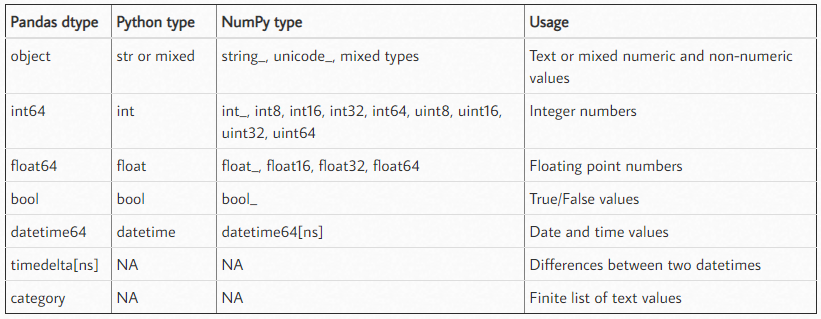


*Category* - categorical data:
1.   Size (X-Small, Small, Medium, Large, X-Large)
2.   Color (Red, Black, White)
3.   Style (Short sleeve, long sleeve)
4.   Material (Cotton, Polyester)

Pros:


1.   Summarization and reporting is done better (it can compare e.g. Small < Large)
2.   Performance increased: RAM usage, group-by increase
3.   Visualization and some analytical (e.g. ML) libraries designed to work with categorical data even better.

Cons:

1.  Background conversion of data (e.g. concatenating of two DataFrames) - *category* data-type can be lost.
2.  In case you convert to category data type, but not listed all categories - such value will be converted to NaN.



In [ ]:
wine_df_retype = wine_df
wine_df_retype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 18.9+ MB


In [ ]:
wine_df_retype.points = wine_df_retype.points.astype("float64")
wine_df_retype.info() #maina tipu pointiem
wine_df_retype.points = wine_df_retype.points.astype("int64")
wine_df_retype.info() #maina tipu pointiem

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  float64
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(2), object(11)
memory usage: 18.9+ MB
<class 'pandas.core.frame.DataFrame'>
In